# Individual Project - Andrea Fabbricatore - 3160153

In [3]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_curve

## Data Exploration and Analysis

In [4]:
df = pd.read_csv("mldata_0003160153.csv", index_col=0)
display(df)
print(f"The shape of the dataframe is: {df.shape}")
print("There are 30 feature columns and one label column")
print(f"The possible label values are: {df['label'].unique()}")

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,-1.528566,1.941861,-1.534801,1.985543,-0.966098,-1.520076,-3.658399,2.341818,2.341818,...,-4.033359,1.252188,0.811014,-0.596619,-0.493627,-1.132114,-0.278899,0.502360,-0.240664,-0.652952
1,0,-1.062406,0.612330,0.518419,0.050667,0.294429,0.381893,-1.826263,-3.723026,-3.723026,...,0.990178,0.338395,-1.269209,0.237999,-1.286323,-0.519957,0.274333,-0.617495,-1.935463,0.368330
2,1,0.250973,-4.784818,-0.080188,-0.544299,3.678963,-4.869788,2.765978,-1.394408,-1.394408,...,-9.884911,-0.712689,-0.909081,-1.158457,0.241637,-2.341955,1.758649,0.012552,-2.211054,0.137013
3,1,-0.023430,0.986917,5.509793,3.357935,-0.649346,1.861404,-0.186834,-2.255727,-2.255727,...,1.155639,0.359041,-1.339210,0.480697,-0.839779,-2.613328,0.542837,0.317944,-4.053712,0.420706
4,0,0.188618,1.128031,1.659015,-0.303993,-1.300325,0.456253,-1.535593,0.579289,0.579289,...,8.595660,0.092709,-1.563998,1.864236,1.289504,1.342953,-0.803655,-1.152678,3.822283,1.279601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,1.379449,-1.895922,-4.354654,1.120147,-0.285596,3.897650,0.080656,3.939890,3.939890,...,-8.054447,0.016443,3.120831,-0.525781,0.181058,-0.946957,2.781470,1.021348,-2.902726,1.250265
1096,0,-0.336874,5.868182,7.390733,-4.235050,-3.624049,13.687674,0.097484,-0.469408,-0.469408,...,4.843506,0.141125,3.536972,-0.998629,-1.150678,-5.856351,-3.308981,0.073544,-6.953209,-0.848286
1097,0,-0.563851,0.954077,0.300919,2.438321,3.295024,-0.303980,-1.662663,-1.667768,-1.667768,...,-2.211126,0.253301,-1.069812,0.879901,0.940374,0.311470,2.166847,-0.438437,-0.756733,-1.146305
1098,2,0.687807,-1.466293,2.146069,3.126226,-2.112429,0.963784,-0.679660,1.817533,1.817533,...,0.441355,-1.220481,-0.817853,-1.727058,-0.641960,-1.327125,0.834162,0.702218,3.442934,-0.065125


The shape of the dataframe is: (1100, 31)
There are 30 feature columns and one label column
The possible label values are: [0 1 2]


Let's check for missing values, as if they exist they will need to be dealt with.

In [5]:
print(f"The number of missing values in the dataset are: {max(df.isnull().sum())}")

The number of missing values in the dataset are: 0


Let's now explore the correlation of the features in the dataframe and moreover the overall shape of the data.

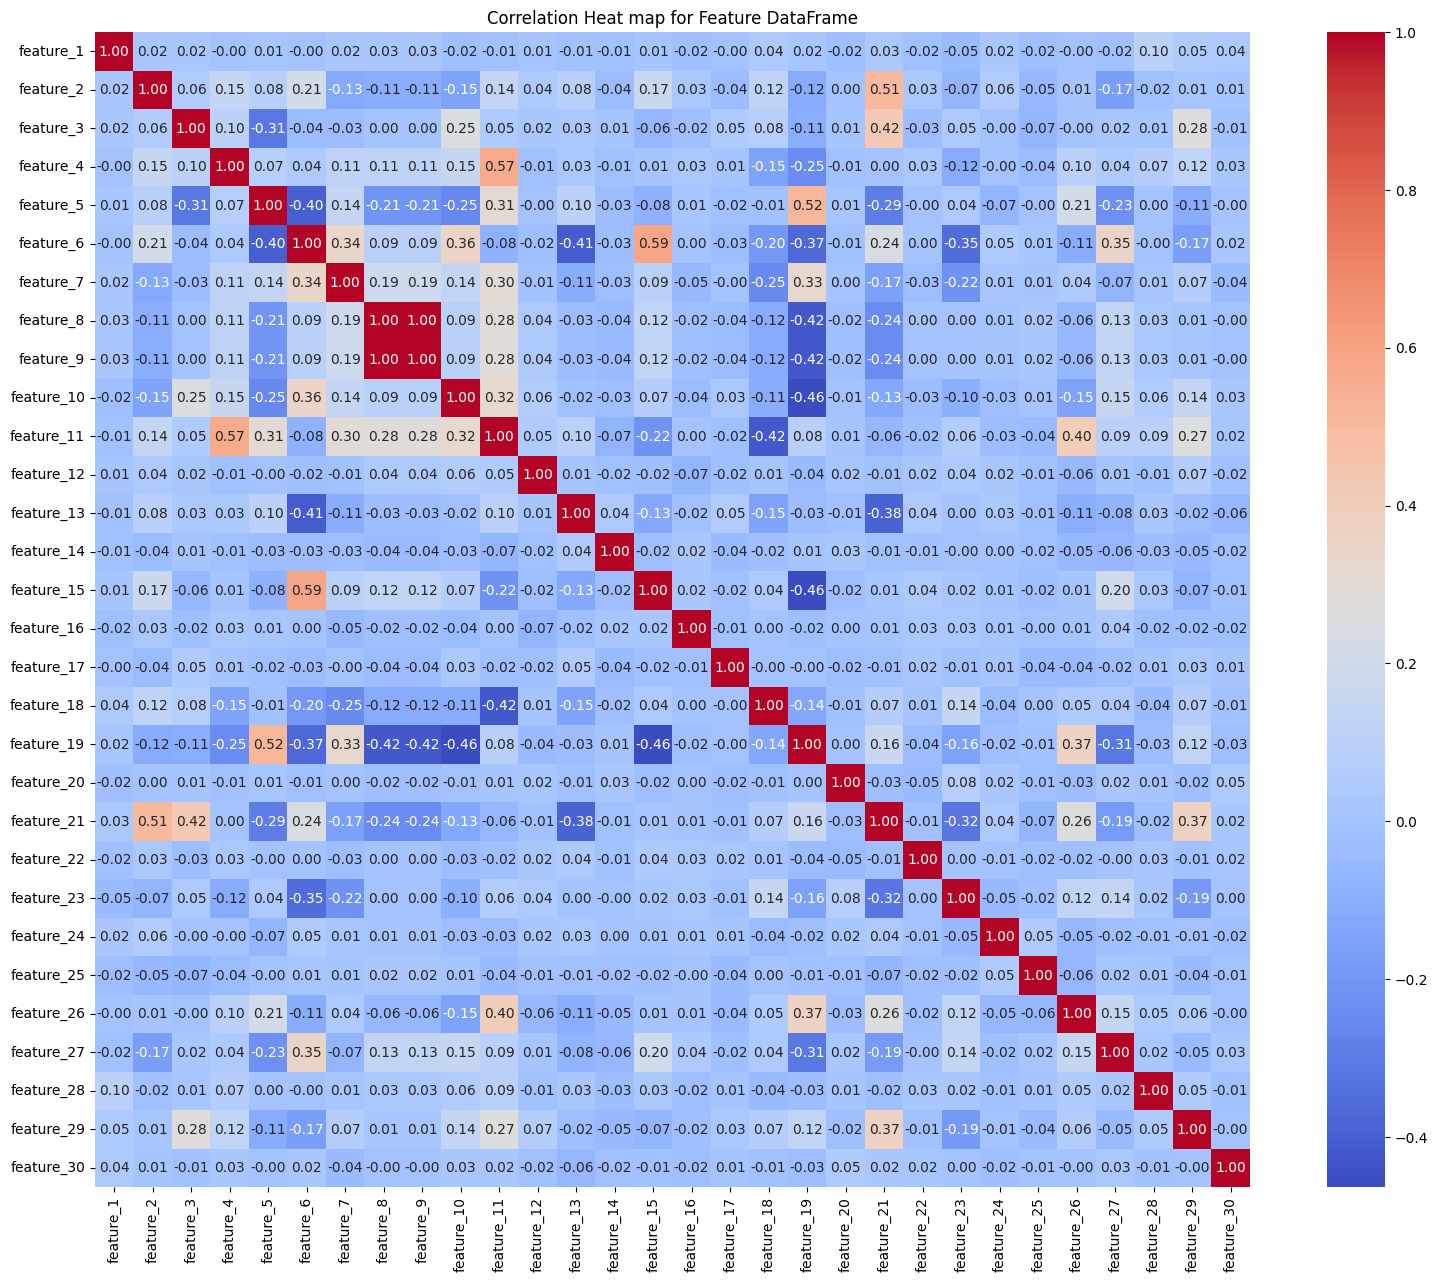

In [19]:
f, ax = plt.subplots(figsize=(20, 15))
corr = df.iloc[:, 1:].corr()
sns.heatmap(corr, vmax=1, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, cmap = 'coolwarm')
plt.title("Correlation Heat map for Feature DataFrame")
plt.show()

Unfortunately, the above correlation heatmap clearly highlights how there is little to no correlation between most features of the dataframe. This is unfortunate as with better correlation we may have achieved better performing models and potentially a greater explained variance in our dimensionality reduction (which will be analysed in the next section.)

Let's firstly check that the data is standardised, and if not let's use a *StandardScaler* to make sure the data for each feature has a similar shape.

In [6]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,1.003636,0.132209,0.074414,0.424639,0.760944,0.313179,0.654326,0.330006,0.015311,0.015311,...,-0.048528,0.074307,-0.110458,0.146413,0.064249,-0.259751,-0.002139,0.087062,-0.370072,0.104249
std,0.808275,0.987829,2.472373,2.346363,2.329284,2.335881,6.436646,2.441224,2.358144,2.358144,...,4.688152,1.003354,2.396976,0.994104,0.949944,2.286660,2.387799,1.026597,2.466665,0.989928
min,0.000000,-3.199796,-7.628813,-7.746602,-7.646247,-8.771754,-16.382187,-7.636340,-10.482861,-10.482861,...,-15.498629,-3.311676,-7.512579,-3.079790,-3.054696,-8.953633,-7.107146,-2.946374,-7.918053,-3.182002
25%,0.000000,-0.508560,-1.659117,-1.122790,-0.652803,-1.049255,-3.657122,-1.310031,-1.411825,-1.411825,...,-3.285177,-0.582628,-1.783363,-0.559413,-0.574493,-1.892563,-1.653886,-0.628174,-1.980882,-0.564630
50%,1.000000,0.152434,0.147399,0.584693,0.785067,0.497722,0.480493,0.277760,0.081304,0.081304,...,-0.015196,0.077065,-0.183306,0.121716,0.062183,-0.166732,-0.077786,0.085441,-0.540237,0.102973
75%,2.000000,0.790999,1.672934,2.020922,2.235317,1.816408,4.769411,1.951882,1.597302,1.597302,...,3.117875,0.736158,1.580765,0.860306,0.677834,1.337918,1.639834,0.766715,1.269640,0.756328
max,2.000000,3.274142,7.858363,7.995359,8.144912,7.839681,23.276125,9.085632,8.039244,8.039244,...,15.129332,3.581818,8.110011,3.567032,3.419755,6.445743,8.174834,4.200501,7.326803,3.416140


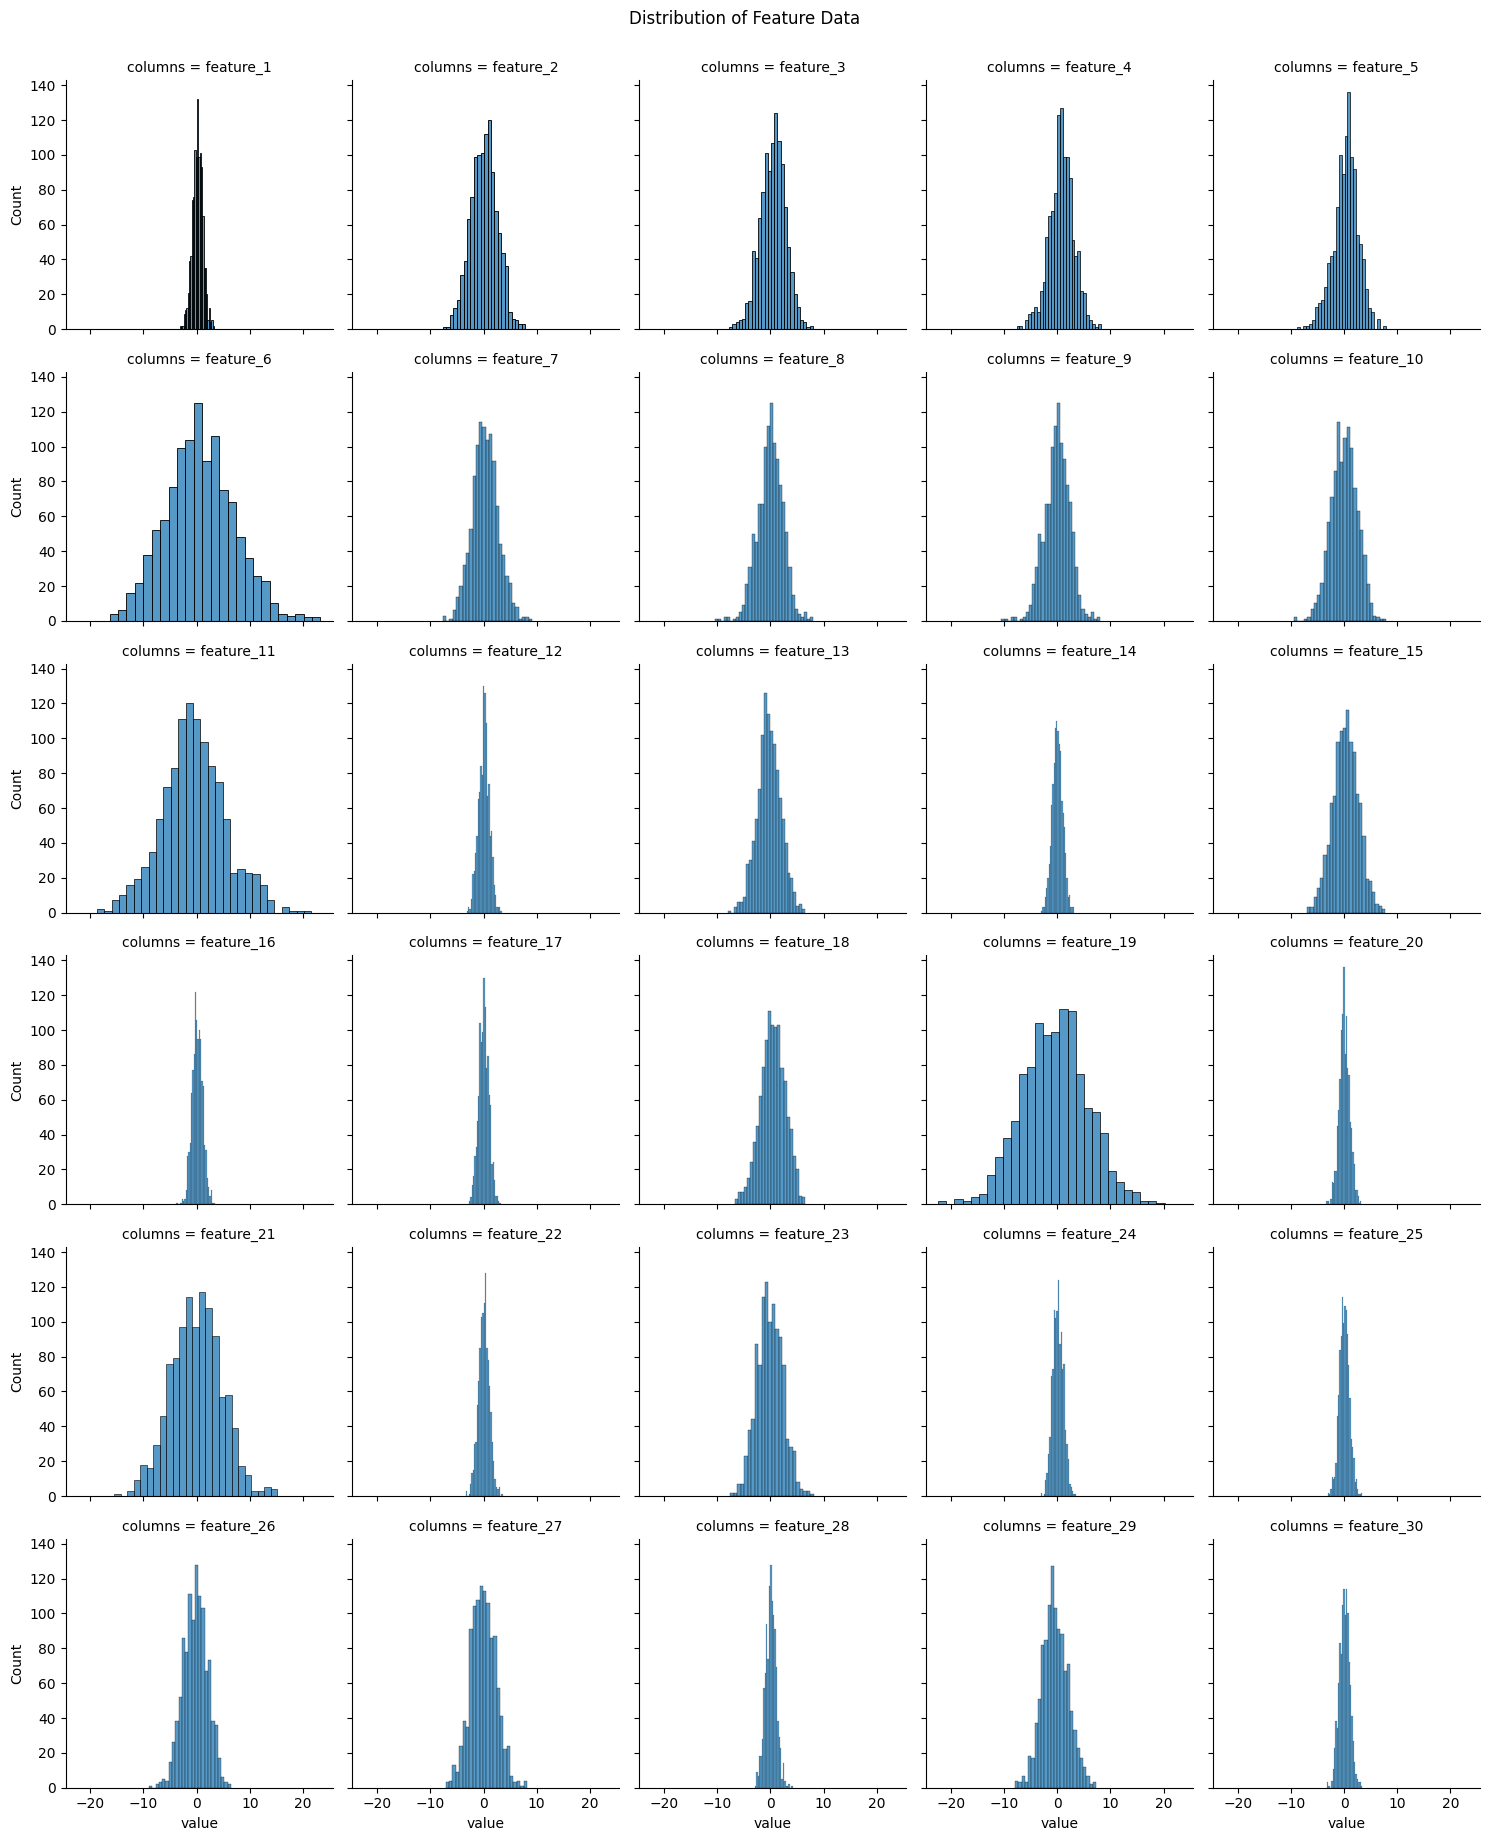

In [37]:
dfm = df.iloc[:, 1:].melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns', col_wrap=5)
g = (g.map(sns.histplot, 'value'))
g.fig.suptitle("Distribution of Feature Data", y=1.02);

As can be seen above, both in the histograms and in the description of the dataframe the data seems to follow more or less a normal distribution. Hence there is no need to apply a standard scaler... nonetheless, a scaled dataframe will be still be created as some models may benefit (as will be confirmed later) from using the normalised dataframe as opposed to the original one.

In [7]:
df_norm = df.copy()
cols_to_scale = [f"feature_{i}" for i in range(1,31)]
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])
df_norm[cols_to_scale] = scaler.transform(df[cols_to_scale])
display(df_norm.describe())

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,...,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1100.000000
mean,1.003636,-6.459479e-18,6.459479e-18,1.453383e-17,1.614870e-17,-2.260818e-17,-6.459479e-18,-5.006097e-17,3.229740e-17,3.229740e-17,...,-1.614870e-18,1.453383e-17,1.291896e-17,9.689219e-18,-1.937844e-17,-2.745279e-17,8.074349e-18,1.937844e-17,3.391227e-17,0.000000
std,0.808275,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,...,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455
min,0.000000,-3.374592e+00,-3.117139e+00,-3.484098e+00,-3.610988e+00,-3.891066e+00,-2.648004e+00,-3.264743e+00,-4.453904e+00,-4.453904e+00,...,-3.297062e+00,-3.376200e+00,-3.089513e+00,-3.246813e+00,-3.284786e+00,-3.803729e+00,-2.976900e+00,-2.956190e+00,-3.061386e+00,-3.321198
25%,0.000000,-6.489582e-01,-7.014798e-01,-6.598014e-01,-6.072210e-01,-5.835286e-01,-6.701330e-01,-6.721149e-01,-6.054699e-01,-6.054699e-01,...,-6.907030e-01,-6.550367e-01,-6.982405e-01,-7.103352e-01,-6.727052e-01,-7.143843e-01,-6.920592e-01,-6.970227e-01,-6.533285e-01,-0.675992
50%,1.000000,2.048367e-02,2.953355e-02,6.824460e-02,1.036102e-02,7.903982e-02,-2.701909e-02,-2.141143e-02,2.799779e-02,2.799779e-02,...,7.113023e-03,2.750207e-03,-3.040513e-02,-2.485464e-02,-2.176526e-03,4.069776e-02,-3.169525e-02,-1.580150e-03,-6.901730e-02,-0.001290
75%,2.000000,6.672111e-01,6.468469e-01,6.806319e-01,6.332605e-01,6.438311e-01,6.396120e-01,6.646723e-01,6.711677e-01,6.711677e-01,...,6.757126e-01,6.599381e-01,7.058863e-01,7.184534e-01,6.462108e-01,6.990090e-01,6.879638e-01,6.623456e-01,6.650511e-01,0.659013
max,2.000000,3.182091e+00,3.149803e+00,3.228045e+00,3.171501e+00,3.223592e+00,3.516131e+00,3.588203e+00,3.404195e+00,3.404195e+00,...,3.238966e+00,3.497376e+00,3.431077e+00,3.442471e+00,3.533926e+00,2.933774e+00,3.426038e+00,4.008691e+00,3.121776e+00,3.347109


## Dimensionality Reduction

In [8]:
#Auxiliary function
def build_pca(n, X, y):
    pca = PCA(n_components=n)
    print(f"Let's fit the {n} Component PCA to our feature dataframe.")
    pca.fit(X)
    print(f"The explained variance in the {n} components is divided as follows:")
    for i,j in enumerate(pca.explained_variance_ratio_):
        print(f"Component {i+1}: {round(j*100, 2)}%")
    print(f"Overall explained variance: {round(sum(pca.explained_variance_ratio_)*100)}%")
    pca_X = pca.transform(X)
    fig = plt.figure(figsize=(8,8))
    if n==3:
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PC 2")
    ax.set_ylabel("PC 1")
    if n == 3:
        ax.set_zlabel("PC 3")
    ax.set_title(f"PCA {n}-component scatterplot for feature data")
    if n == 3:
        ax.scatter(pca_X.T[0], pca_X.T[1], pca_X.T[2], c=y)
    else:
        ax.scatter(pca_X.T[0], pca_X.T[1], c=y)
    plt.show()

I will be applying a dimensionality reduction on both the original and scaled dataframes to further analyse the shape and separability of the data.

Normalised:
Let's fit the 2 Component PCA to our feature dataframe.
The explained variance in the 2 components is divided as follows:
Component 1: 10.76%
Component 2: 8.5%
Overall explained variance: 19%


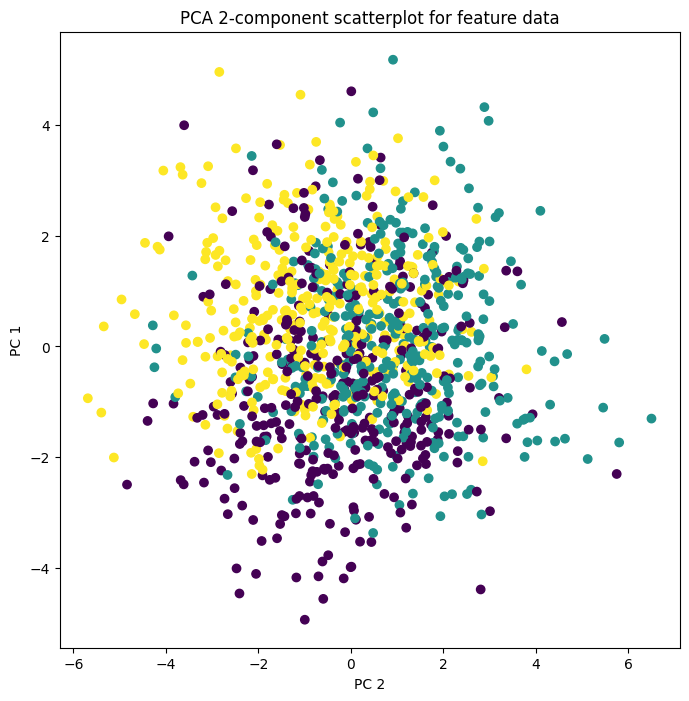

Original:
Let's fit the 2 Component PCA to our feature dataframe.
The explained variance in the 2 components is divided as follows:
Component 1: 27.56%
Component 2: 18.38%
Overall explained variance: 46%


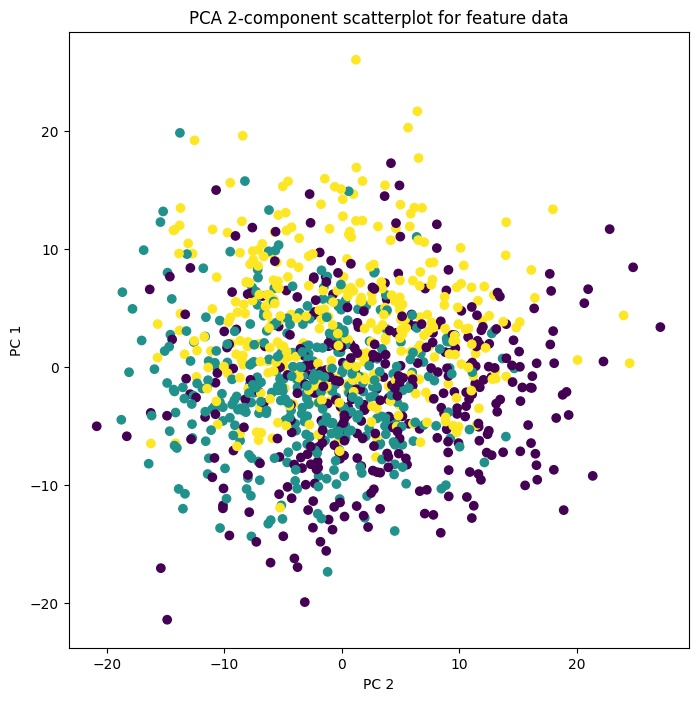

In [25]:
print("Normalised:")
build_pca(2,df_norm.drop(columns=['label']),df_norm['label'])
print("Original:")
build_pca(2,df.drop(columns=['label']),df['label'])

The above visualisation allows us to discern the fact that the 2 principal components are not linearly separable. Moreover, I can see that the PCA performs much better on the original dataframe in comparison to the scaled one (having a total explained variance more than double the size).

I will also plot the 3 principal components in a 3d scatter plot to make sure they are still not separable in higher dimensions (as far as can be visualised in graphs) and to see how the explained variance evolves over more components.

Normalised:
Let's fit the 3 Component PCA to our feature dataframe.
The explained variance in the 3 components is divided as follows:
Component 1: 10.76%
Component 2: 8.5%
Component 3: 7.81%
Overall explained variance: 27%


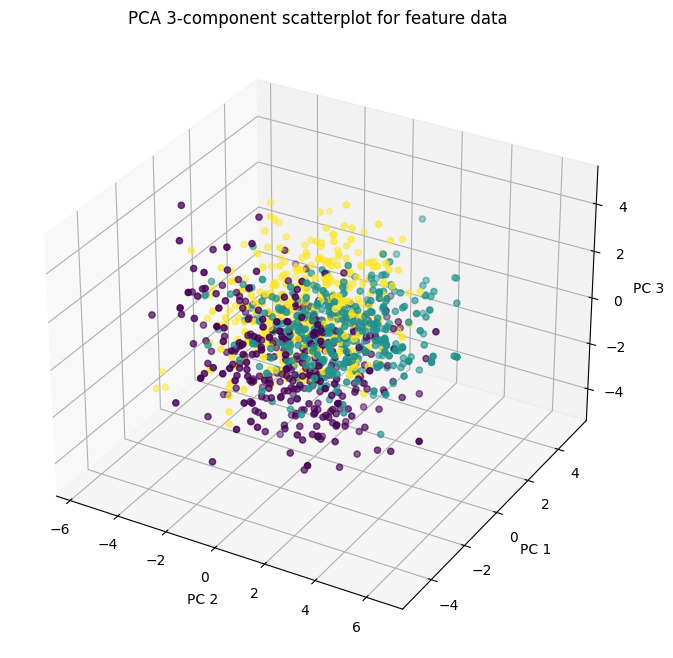

Original:
Let's fit the 3 Component PCA to our feature dataframe.
The explained variance in the 3 components is divided as follows:
Component 1: 27.56%
Component 2: 18.38%
Component 3: 16.38%
Overall explained variance: 62%


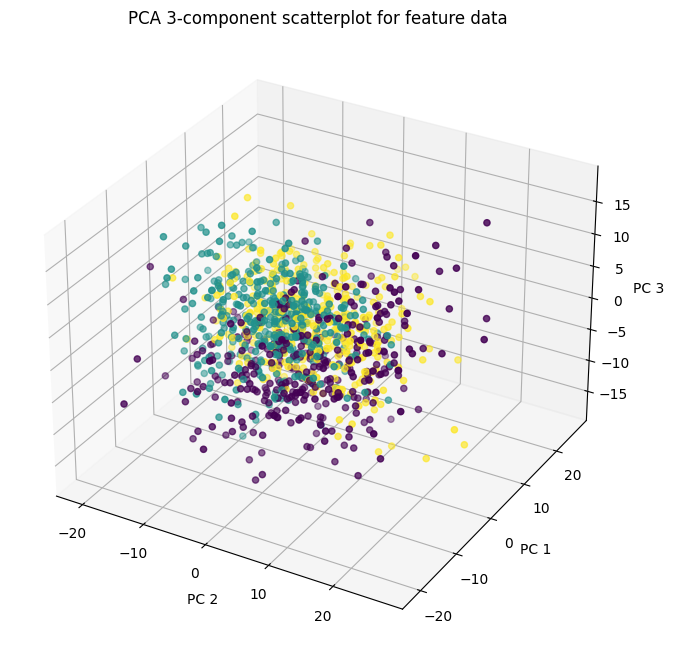

In [26]:
print("Normalised:")
build_pca(3,df_norm.drop(columns=['label']),df_norm['label'])
print("Original:")
build_pca(3,df.drop(columns=['label']),df['label'])

The explained variance has increased again quite significantly, and moreover it is evidently higher on the original dataframe in comparison to the normalised one. I will now see how the explained variance changes over the number of components, as if I can reach a higher level of variance (~90%) with a number of components largely smaller than the 30 features I currently have, it could make sense to pursue it when building the models.

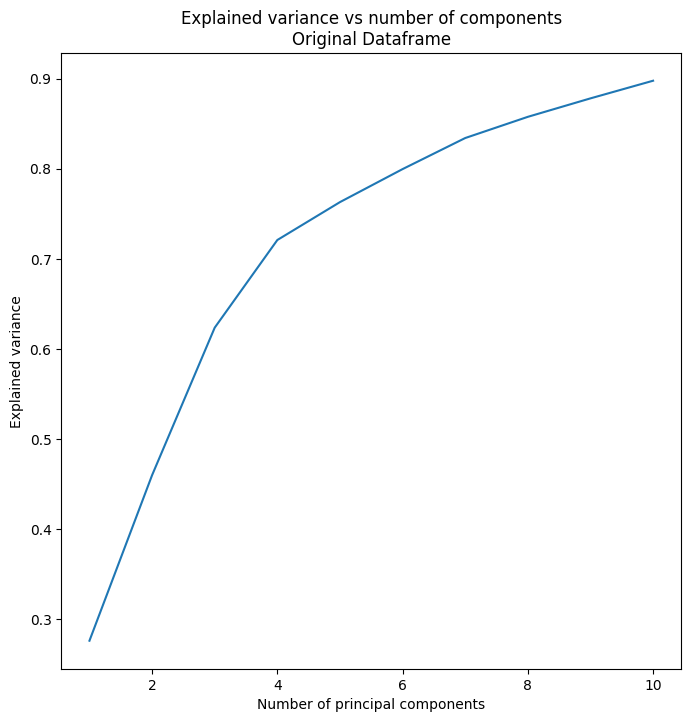

In [27]:
variances = []
for i in range(1,11):
    pca = PCA(n_components=i)
    pca.fit(df.drop(columns=['label']))
    variances.append(sum(pca.explained_variance_ratio_))
plt.figure(figsize=(8,8))
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance")
plt.title("Explained variance vs number of components\nOriginal Dataframe")
plt.plot([i for i in range(1,11)],[i for i in variances], label="Total Explained Variance")
#plt.plot([i for i in range(1,11)],[j/sum(variances[:i+1]) for i,j in enumerate(variances)], label="Marginal Variance increase\nover Total Variance")
#plt.legend()
plt.show()

Looking at the graph, I can see that although the variance increases with the number of components it starts to plateau at around 4 components. Nonetheless I will use a 10 component PCA as it achieves a total explained variance of around 90% all the while reducing the dimensionality of the features by a factor of 1/3.

## Building the training and testing datasets

In [28]:
y = df['label']
X_norm = df_norm.drop(columns=['label'])
X = df.drop(columns=['label'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [30]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

I made different train/test datasets for both the original dataframe and the standardised one, in the circumstance that the latter may actually hinder our model's performance.

## Models

I will begin by implementing a logistic regression on the data, followed by a SVM to then finish with hyperparameter tuning to find the model with highest accuracy.

Both Linear SVC and Logistic Regression act as binary classifiers, therefore since our label has possible values of [0,1,2] I set the multi_class attribute as ovr (representing One vs Rest). This is an approach to deal with non-binary labels using binary classifiers.

In [31]:
lr = LogisticRegression(random_state=0, multi_class='ovr')
lr.fit(X_train, y_train)
lr_X_score = lr.score(X_test, y_test)
lr.fit(X_norm_train, y_norm_train)
lr_X_norm_score = lr.score(X_norm_test, y_norm_test)
lr.fit(X_train_pca, y_train)
lr_X_pca_score = lr.score(X_test_pca, y_test)
print(f"The initial accuracy of the Logistic Regression on the original df is: {round(lr_X_score*100,2)}%")
print(f"The initial accuracy of the Logistic Regression on the normalised df is: {round(lr_X_norm_score*100,2)}%")
print(f"The initial accuracy of the Logistic Regression on the 10-component PCA df is: {round(lr_X_pca_score*100,2)}%")

The initial accuracy of the Logistic Regression on the original df is: 74.09%
The initial accuracy of the Logistic Regression on the normalised df is: 74.09%
The initial accuracy of the Logistic Regression on the 10-component PCA df is: 40.45%


In [32]:
svc = LinearSVC(random_state=0, multi_class='ovr', dual=False)
svc.fit(X_train, y_train)
svc_X_score = svc.score(X_test, y_test)
svc.fit(X_norm_train, y_norm_train)
svc_X_norm_score = svc.score(X_norm_test, y_norm_test)
svc.fit(X_train_pca, y_train)
svc_X_pca_score = svc.score(X_test_pca, y_test)
print(f"The initial accuracy of the Linear SVC on the original df is: {round(svc_X_score*100,2)}%")
print(f"The initial accuracy of the Linear SVC on the normalised df is: {round(svc_X_norm_score*100,2)}%")
print(f"The initial accuracy of the Linear SVC on the 10-component PCA df is: {round(svc_X_pca_score*100,2)}%")

The initial accuracy of the Linear SVC on the original df is: 74.09%
The initial accuracy of the Linear SVC on the normalised df is: 74.09%
The initial accuracy of the Linear SVC on the 10-component PCA df is: 41.36%


After the above, quite rudimentary check, I can discern that the performance using the standard parameters of the models is the same on both the original and normalised dataframes. Moreover, it is also clear that the performance with the dimensionality reduction is extremely poor and hence will be disregarded during the remainder of the project. Nonetheless, I will still test and optimise the models on all datasets and only keep the dataset/model which performs best (hence only results on the best dataset will be shown).

## Hyperparameter Tuning

Before continuing I would like to note that after having attempted to use the standard grid search cross validation with a more complete (continuous) set of parameters in the grid, and seeing that my hardware was not capable of running it in satisfactory time (<20min)... I decided to cut down on the number of parameters for the numerical arguments such as 'C' and use a randomised grid search CV which overall seemed to also provide satisfactory results.

In [33]:
#auxiliary function
def build_conf_matrix(model, model_name, X, y):
    y_pred = model.predict(X)
    adv_svc_cf_matrix = confusion_matrix(y, y_pred)
    ax = sns.heatmap(adv_svc_cf_matrix, annot=True, cmap='Blues')

    ax.set_title(f'Confusion Matrix for {model_name}\n')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')

    ax.xaxis.set_ticklabels(['0','1', '2'])
    ax.yaxis.set_ticklabels(['0','1', '2'])

    plt.show()

### Hyperparamter Tuning for Logistic Regression

I first create a dictionary for the possible hyperparameters and then run a randomised grid search cross validation to choose the best combination. The randomised grid search is chosen as opposed to a normal grid search as it is computationally cheaper and tends to have a result of similar level.

In [34]:
#There was an issue with the solvers only allowing certain types of penalties, so I split the grid by solvers and put all possible iterations in each.
#There was an issue with convergence for the saga solver and so max_iter was increased to 30000 where it caused no issue.
logistic_params = [
    {'solver': ['saga'],
    'penalty': ['elasticnet', 'l1', 'l2'],
    'C': [0.1,1,2,10,100,1000],
    'fit_intercept':[True, False],
    'max_iter': [30000]},
    {'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2'],
    'C': [0.1,1,2,10,100,1000],
    'fit_intercept':[True, False]},
]
logistic_grid = RandomizedSearchCV(LogisticRegression(random_state=0, multi_class='ovr'), logistic_params, refit=True, random_state=0, verbose=2, error_score='raise')
logistic_grid.fit(X_norm_train, y_norm_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=100, fit_intercept=True, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=30000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=30000, penalty=l2, s

RandomizedSearchCV(error_score='raise',
                   estimator=LogisticRegression(multi_class='ovr',
                                                random_state=0),
                   param_distributions=[{'C': [0.1, 1, 2, 10, 100, 1000],
                                         'fit_intercept': [True, False],
                                         'max_iter': [30000],
                                         'penalty': ['elasticnet', 'l1', 'l2'],
                                         'solver': ['saga']},
                                        {'C': [0.1, 1, 2, 10, 100, 1000],
                                         'fit_intercept': [True, False],
                                         'penalty': ['l2'],
                                         'solver': ['newton-cg', 'lbfgs']}],
                   random_state=0, verbose=2)

In [35]:
logistic_grid.best_params_

{'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 30000,
 'fit_intercept': False,
 'C': 1000}

The above show the best parameters using a randomised grid search for the Logistic Regression model, they will now be scored.

In [36]:
optimised_lr = LogisticRegression(random_state=0, solver='saga', penalty='l2', fit_intercept=False, C=1000, max_iter=30000, multi_class='ovr')
optimised_lr.fit(X_norm_train, y_norm_train)
optmised_lr_score = optimised_lr.score(X_norm_test, y_norm_test)
print(f"The optimised score of the Logistic Regression on the normalised df is: {round(optmised_lr_score*100,2)}%")
print(f"This is a change of: {round((optmised_lr_score-lr_X_norm_score)*100,2)}% upwards")

The optimised score of the Logistic Regression on the normalised df is: 75.0%
This is a change of: 0.91% upwards


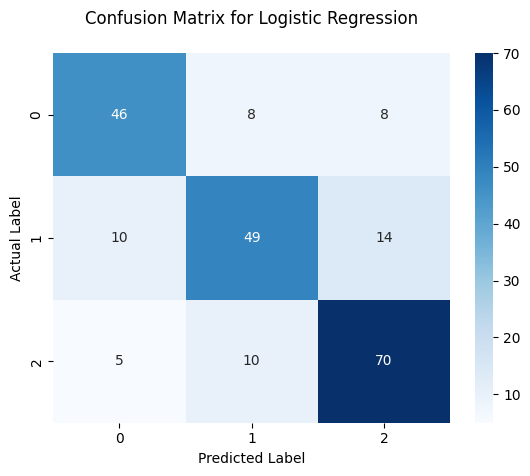

In [37]:
build_conf_matrix(optimised_lr, "Logistic Regression", X_norm_test, y_norm_test)

I got a slight increase in accuracy using the randomised grid search and I will now compare it to the Linear SVM to decide which model is better.

### Hyperparamter Tuning for Linear SVM

Again I first create a dictionary for the possible hyperparameters and then run a randomised grid search cross validation to choose the best combination.

In [38]:
#There are certain values that cannot go together, such as the l1 penalty and hinge loss when the dual is True etc..
#I run different iterations of the svm_params to ensure that all the cases are covered
#Much like the previous case for the Logistic Regression, there was an issue with convergence when the dual is True and so I increased the max_iter to 60000
svm_params = [
    {'dual': [False],
    'penalty': ['l1','l2'],
    'C': [0.1,1,2,10,100,1000],
    'loss':['squared_hinge'], 
    'fit_intercept':[True, False],
    'max_iter': [30000]},
    {'dual': [True],
    'penalty': ['l2'],
    'C': [0.1,1,2,10,100,1000],
    'loss':['squared_hinge'], 
    'fit_intercept':[True, False],
    'max_iter': [60000]},
    {'dual': [True],
    'penalty': ['l2'],
    'C': [0.1,1,2,10,100,1000],
    'loss':['hinge'], 
    'fit_intercept':[True, False],
    'max_iter': [60000]},
    ]
svm_grid = RandomizedSearchCV(LinearSVC(random_state=0, multi_class='ovr', dual=False), svm_params, refit=True, random_state=0, verbose=2, error_score='raise')
svm_grid.fit(X_norm_train, y_norm_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=2, dual=True, fit_intercept=False, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   0.7s
[CV] END C=2, dual=True, fit_intercept=False, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   0.8s
[CV] END C=2, dual=True, fit_intercept=False, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   0.7s
[CV] END C=2, dual=True, fit_intercept=False, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   0.5s
[CV] END C=2, dual=True, fit_intercept=False, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   0.6s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=30000, penalty=l1; total time=   0.2s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=30000, penalty=l1; total time=   0.3s
[CV] END C=1, dual=False, fit_intercept=True, loss=squared_hinge, max_iter=30000, penalty=l1; total time=   0.0s
[CV] END C=1, dual=False, fit_inter

/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   7.9s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   8.8s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   9.9s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   8.7s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   7.3s
[CV] END C=0.1, dual=True, fit_intercept=False, loss=hinge, max_iter=60000, penalty=l2; total time=   0.0s
[CV] END C=0.1, dual=True, fit_intercept=False, loss=hinge, max_iter=60000, penalty=l2; total time=   0.0s
[CV] END C=0.1, dual=True, fit_intercept=False, loss=hinge, max_iter=60000, penalty=l2; total time=   0.0s
[CV] END C=0.1, dual=True, fit_intercept=False, loss=hinge, max_iter=60000, penalty=l2; total time=   0.0s
[CV] END C=0.1, dual=True, fit_intercept=False, loss=hinge, max_iter=60000, penalty=l2; total time=   0.0s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   6.7s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   6.5s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   6.6s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   6.4s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000, dual=True, fit_intercept=True, loss=squared_hinge, max_iter=60000, penalty=l2; total time=   6.1s
[CV] END C=2, dual=True, fit_intercept=True, loss=hinge, max_iter=60000, penalty=l2; total time=   0.2s
[CV] END C=2, dual=True, fit_intercept=True, loss=hinge, max_iter=60000, penalty=l2; total time=   0.2s
[CV] END C=2, dual=True, fit_intercept=True, loss=hinge, max_iter=60000, penalty=l2; total time=   0.2s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2, dual=True, fit_intercept=True, loss=hinge, max_iter=60000, penalty=l2; total time=   0.3s
[CV] END C=2, dual=True, fit_intercept=True, loss=hinge, max_iter=60000, penalty=l2; total time=   0.2s
[CV] END C=1, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l2; total time=   0.0s
[CV] END C=1, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l2; total time=   0.0s
[CV] END C=2, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l1; total time=   0.4s
[CV] END C=2, dual=False, fit_intercept=False, loss=squared_hinge, max_iter=30000, penalty=l1; total time=  

RandomizedSearchCV(error_score='raise',
                   estimator=LinearSVC(dual=False, random_state=0),
                   param_distributions=[{'C': [0.1, 1, 2, 10, 100, 1000],
                                         'dual': [False],
                                         'fit_intercept': [True, False],
                                         'loss': ['squared_hinge'],
                                         'max_iter': [30000],
                                         'penalty': ['l1', 'l2']},
                                        {'C': [0.1, 1, 2, 10, 100, 1000],
                                         'dual': [True],
                                         'fit_intercept': [True, False],
                                         'loss': ['squared_hinge'],
                                         'max_iter': [60000],
                                         'penalty': ['l2']},
                                        {'C': [0.1, 1, 2, 10, 100, 1000],
                                         'dual': [True],
                                         'fit_intercept': [True, False],
                                         'loss': ['hinge'], 'max_iter': [60000],
                                         'penalty': ['l2']}],
                   random_state=0, verbose=2)

In [39]:
svm_grid.best_params_

{'penalty': 'l2',
 'max_iter': 60000,
 'loss': 'hinge',
 'fit_intercept': True,
 'dual': True,
 'C': 2}

Above we have the fine tuned hyperparameters for the Linear SVM

In [40]:
optimised_svc = LinearSVC(random_state=0, multi_class='ovr', penalty='l2', loss='hinge', fit_intercept=True, dual=True, C=2, max_iter=60000)
optimised_svc.fit(X_norm_train, y_norm_train)
optmised_svc_score = optimised_svc.score(X_norm_test, y_norm_test)
print(f"The optimised score of the Linear SVM on the normalised df is: {round(optmised_svc_score*100,2)}%")
print(f"This is a change of: {round((optmised_svc_score-svc_X_norm_score)*100,2)}% upwards")

The optimised score of the Linear SVM on the normalised df is: 75.91%
This is a change of: 1.82% upwards


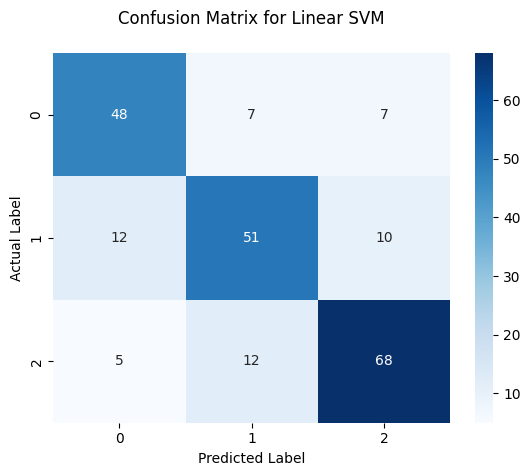

In [41]:
build_conf_matrix(optimised_svc, "Linear SVM", X_norm_test, y_norm_test)

I received a better improvement in the Linear SVM in comparison to our logistic regression, overall allowing this model to be the more accurate one.

## Further Model Selection

Since the accuracy achieved by the above models was not very high, I will try to use other models to decide (as an extension) whether there are better performing choices for the data at hand.

### Non-Linear SVM

The data does not seem to be linearly separable and therefore I will try non-linear versions of the SVM first by running a random grid search CV over hyperparametes including  different kernels, in an attempt to better achieve performance.

In [42]:
adv_svc_params = {
    'C': [0.1,1,2,10,100,1000],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}
adv_svm_grid = RandomizedSearchCV(SVC(random_state=0), adv_svc_params, refit=True, random_state=0, verbose=2, error_score='raise')
adv_svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=2, decision_function_shape=ovo, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=2, decision_function_shape=ovo, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=2, decision_function_shape=ovo, gamma=auto, kernel=linear; total time=   0.4s
[CV] END C=2, decision_function_shape=ovo, gamma=auto, kernel=linear; total time=   0.3s
[CV] END C=2, decision_function_shape=ovo, gamma=auto, kernel=linear; total time=   0.3s
[CV] END C=100, decision_function_shape=ovo, gamma=scale, k

RandomizedSearchCV(error_score='raise', estimator=SVC(random_state=0),
                   param_distributions={'C': [0.1, 1, 2, 10, 100, 1000],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=0, verbose=2)

In [43]:
adv_svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovo', 'C': 2}

In [44]:
optimised_adv_svc = SVC(random_state=0, kernel='rbf', gamma='scale', decision_function_shape='ovo', C=2)
optimised_adv_svc.fit(X_train, y_train)
optimised_adv_svc_score = optimised_adv_svc.score(X_test, y_test)
print(f"The optimised score of the Linear SVM on the original df is: {round(optimised_adv_svc_score*100,2)}%")

The optimised score of the Linear SVM on the original df is: 89.55%


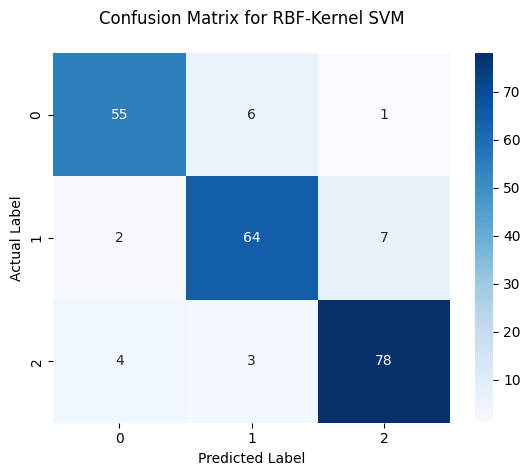

In [45]:
build_conf_matrix(optimised_adv_svc, "RBF-Kernel SVM", X_test, y_test)

The result, as expected with a non linear classifier, is much higher than the previous two cases. Specifically, the highest achieved accuracy (previously) was 75.9% and considering that I was now able to reach an accuracy of 89.6%, that is a staggering increase of 13.7%. I will nonetheless try another model to see if this performance can be beaten.

### MLP Classifier

Finally I will implement a multilayer perceptron classifier to see if its high adaptability allows us to score better accuracy than that achieved by the RBF-kernel SVM. I proceed like before, by doing a randomised grid search cross-validation and optimising a MLP. We allow for the grid search to compare different activation functions and solvers.

In [46]:
mlp_params = {
    'hidden_layer_sizes': [(4,), (6,), (30,), (50,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.1,1,2,10,100,1000],
    'max_iter': [1000]
}

mlp_grid = RandomizedSearchCV(MLPClassifier(random_state=0), mlp_params, refit=True, random_state=0, verbose=2, error_score='raise')
mlp_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=logistic, alpha=100, hidden_layer_sizes=(6,), max_iter=1000, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=100, hidden_layer_sizes=(6,), max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=100, hidden_layer_sizes=(6,), max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=100, hidden_layer_sizes=(6,), max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=100, hidden_layer_sizes=(6,), max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=10, hidden_layer_siz

/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=1, hidden_layer_sizes=(6,), max_iter=1000, solver=lbfgs; total time=   0.7s


/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=1, hidden_layer_sizes=(6,), max_iter=1000, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1, hidden_layer_sizes=(6,), max_iter=1000, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=1, hidden_layer_sizes=(6,), max_iter=1000, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=1, hidden_layer_sizes=(6,), max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), max_iter=1000, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), max_iter=1000, solver=lbfgs; total time=   0.9s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), max_iter=1000, solver=lbfgs; total time=   1.5s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), max_iter=1000, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, alpha=10, hidden_layer_sizes=(50,), max_iter=1000, solver=lbfgs; total time=   1.0s
[CV] END activatio

/Users/andreafabbricatore/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1000, hidden_layer_sizes=(4,), max_iter=1000, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1000, hidden_layer_sizes=(4,), max_iter=1000, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1000, hidden_layer_sizes=(4,), max_iter=1000, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1000, hidden_layer_sizes=(4,), max_iter=1000, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1000, hidden_layer_sizes=(4,), max_iter=1000, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1, hidden_layer_sizes=(4,), max_iter=1000, solver=lbfgs; total time=   0.2s
[CV] END 

RandomizedSearchCV(error_score='raise', estimator=MLPClassifier(random_state=0),
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.1, 1, 2, 10, 100, 1000],
                                        'hidden_layer_sizes': [(4,), (6,),
                                                               (30,), (50,),
                                                               (100,)],
                                        'max_iter': [1000],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=0, verbose=2)

In [47]:
mlp_grid.best_params_

{'solver': 'lbfgs',
 'max_iter': 1000,
 'hidden_layer_sizes': (50,),
 'alpha': 0.1,
 'activation': 'relu'}

In [48]:
optimised_mlp = MLPClassifier(random_state=0, max_iter=1000, solver='lbfgs', hidden_layer_sizes=(50,), alpha=0.1, activation='relu')
optimised_mlp.fit(X_train, y_train)
optimised_mlp_score = optimised_mlp.score(X_test, y_test)
print(f"The optimised score of the MLP on the original df is: {round(optimised_mlp_score*100,2)}%")

The optimised score of the MLP on the original df is: 89.09%


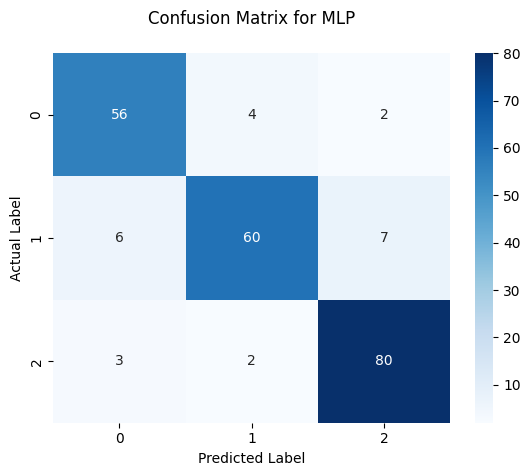

In [49]:
build_conf_matrix(optimised_mlp, "MLP", X_test, y_test)

Using the multilayer perceptron and optimising it through the random grid search cross validation I achieved a good accuracy of 89.1%, a result slightly worse than the non-linear SVM.

## Comparing the results

In [50]:
def model_scoring(model, norm):
    if norm:
        X1, X2, y1, y2 = X_norm_train, X_norm_test, y_norm_train, y_norm_test
    else:
        X1, X2, y1, y2 = X_train, X_test, y_train, y_test
    model.fit(X1,y1)
    pred = model.predict(X2)
    accuracy = model.score(X2, y2)
    precision = precision_score(y2, pred, average='weighted')
    recall = recall_score(y2, pred, average='weighted')
    return [round(precision,4), round(recall,4), round(accuracy,4)]


In [51]:
results = pd.DataFrame.from_dict({
    'Logistic Regression': model_scoring(optimised_lr, True),
    'Linear SVM': model_scoring(optimised_svc, True),
    'RBF SVM': model_scoring(optimised_adv_svc, False),
    'MLP': model_scoring(optimised_mlp, False)
    })
results.index = ["Precision", "Recall", "Accuracy"]

display(results)

,Logistic Regression,Linear SVM,RBF SVM,MLP
Precision,0.7492,0.7590,0.8954,0.8917
Recall,0.7500,0.7591,0.8955,0.8909
Accuracy,0.7500,0.7591,0.8955,0.8909


The table above highlights quite neatly the results achieved in the exploration above. That is, between the two initial models the Linear SVM had the overall better performance while when taking the extensions into account the RBF-Kernel SVM largely beat the competition with results almost 15% higher than the initial models. As an extension, it would have been interesting to be more systematic in the way the grid search was performed, by having numerical parameters (such as C) optimised on a space with smaller step sizes as opposed to a very staggered and discrete one (as it would have clearly found a more optimal result) - nonetheless, considering the computational constraints, the results achieved in the end are still quite satisfactory.

## Predicting on unseen features

After being given an unseen dataframe consisting of feature data, I will proceed by using my best model (RBF-Kernel SVM) to create a prediction on them.

In [63]:
unseen_df = pd.read_csv("mldata_0003160153.TEST_FEATURES.csv", index_col=0)
display(unseen_df)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,
0,-0.342364,1.959130,0.781007,-0.168950,-1.362359,12.055261,-0.333748,2.043902,2.043902,3.009175,...,-3.659726,0.575020,0.501344,0.391837,-1.162492,-3.792127,1.732847,0.681210,-5.418075,2.645713
1,0.683556,3.114549,2.465190,0.940812,-1.973671,9.095801,-0.669733,-2.750988,-2.750988,3.254787,...,6.399622,-0.779784,-0.455275,0.820145,1.629883,-1.642686,0.147171,0.477854,0.977359,-1.013831
2,0.973279,2.486792,2.201586,0.200201,1.757459,-4.634521,2.009088,-1.759053,-1.759053,0.207656,...,0.681570,0.790758,-0.175555,-0.022975,0.440274,-0.364356,0.590280,-0.393233,2.387291,-0.627628
3,-1.457232,-4.419316,4.442727,5.745234,7.551861,-20.601397,-1.142179,-3.806642,-3.806642,2.514636,...,-5.549477,-0.586325,0.642875,1.451047,0.698808,-0.807730,-6.269457,0.391158,-0.674868,3.246142
4,0.051996,-1.756800,-1.601707,1.050108,1.324550,2.389691,2.974654,4.530914,4.530914,-0.557967,...,-1.609494,-1.030903,-0.956645,-0.529240,-0.091913,0.595588,1.105150,0.545755,1.003174,-0.169880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.981988,-3.358616,1.966196,-0.018654,-1.148838,-3.030848,1.075965,4.008608,4.008608,1.604026,...,-1.979822,-0.934672,0.433902,1.093791,-0.401557,2.006410,1.908313,-1.131445,0.678856,1.796503
1096,-1.436780,1.783803,2.351720,-0.659635,0.345538,6.089619,0.764592,-2.246422,-2.246422,-2.383059,...,5.549605,0.449465,2.037788,-0.386368,-1.095788,2.827336,3.103955,0.135150,-0.103415,1.167789
1097,0.774074,5.269243,1.550133,1.595496,5.792036,-4.336889,-1.084832,-6.751127,-6.751127,-4.717437,...,4.914554,1.712435,0.401008,0.042134,-0.212848,1.928387,1.340324,1.383310,-2.098646,-0.728361


In [64]:
final_y_pred = optimised_adv_svc.predict(unseen_df)

In [65]:
res = "\n".join([str(i) for i in final_y_pred])
with open("test_predictions.txt", "w") as f:
    f.write(res)